In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [3]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48673 entries, 0 to 48672
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      48673 non-null  int64  
 1   Created Date                    48673 non-null  object 
 2   Closed Date                     48409 non-null  object 
 3   Agency                          48673 non-null  object 
 4   Agency Name                     48673 non-null  object 
 5   Complaint Type                  48673 non-null  object 
 6   Descriptor                      47990 non-null  object 
 7   Location Type                   48673 non-null  object 
 8   Incident Zip                    48367 non-null  float64
 9   Incident Address                43011 non-null  object 
 10  Street Name                     43011 non-null  object 
 11  Cross Street 1                  42283 non-null  object 
 12  Cross Street 2                  

In [5]:
df.shape  #shape of database

(48673, 53)

In [6]:
null_counts = df.isnull().sum()   # null values

In [7]:
null_counts

Unique Key                            0
Created Date                          0
Closed Date                         264
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                          683
Location Type                         0
Incident Zip                        306
Incident Address                   5662
Street Name                        5662
Cross Street 1                     6390
Cross Street 2                     6438
Intersection Street 1             43071
Intersection Street 2             43125
Address Type                        349
City                                307
Landmark                          48644
Facility Type                       259
Status                                0
Due Date                              0
Resolution Description                1
Resolution Action Updated Date      260
Community Board                       1
Borough                               1


In [28]:
null_vars = null_counts[null_counts > 0]  # plot a graph of null values to visualize


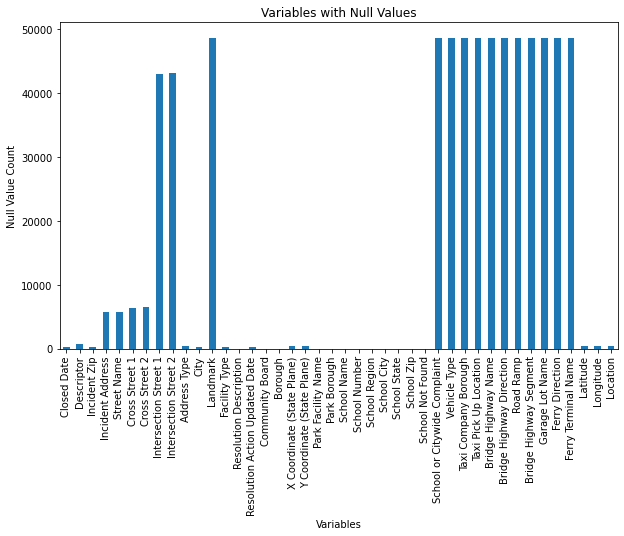

In [29]:
plt.figure(figsize=(10, 6))
null_vars.plot(kind='bar')
plt.title('Variables with Null Values')
plt.xlabel('Variables')
plt.ylabel('Null Value Count')
plt.show()

In [30]:
#dropping unneccessary columns
columns_to_drop = ["Intersection Street 1","Intersection Street 2","Landmark","School or Citywide Complaint","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name",
"Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Garage Lot Name","Ferry Direction","Ferry Terminal Name"] 
df = df.drop(columns=columns_to_drop)

In [41]:
df.shape

(48673, 40)

In [31]:
unique_values = df['Created Date'].unique()
unique_values 

array(['2015-12-31T23:59:45.000000000', '2015-12-31T23:59:44.000000000',
       '2015-12-31T23:59:29.000000000', ...,
       '2015-11-14T11:00:28.000000000', '2015-11-14T10:59:17.000000000',
       '2015-11-14T10:59:06.000000000'], dtype='datetime64[ns]')

In [32]:
unique_values1 = df['Closed Date'].unique()
unique_values1

array(['2016-01-01T00:55:15.000000000', '2016-01-01T01:26:57.000000000',
       '2016-01-01T04:51:03.000000000', ...,
       '2015-11-14T11:42:22.000000000', '2015-11-14T12:51:31.000000000',
       '2015-11-14T12:14:52.000000000'], dtype='datetime64[ns]')

In [52]:
#  convert to pd.date format
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [53]:
#convert to  pd.date format
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [54]:
# Calculate the response time for each row
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

In [55]:
# Print the response time for each row
print(df['Request_Closing_Time'])

0       0 days 00:55:30
1       0 days 01:27:13
2       0 days 04:51:34
3       0 days 07:45:27
4       0 days 03:27:44
              ...      
48668   0 days 03:06:02
48669   0 days 02:54:49
48670   0 days 00:41:54
48671   0 days 01:52:14
48672   0 days 01:15:46
Name: Request_Closing_Time, Length: 48673, dtype: timedelta64[ns]


Based on generic data mining of the service request data, 
1. Distribution of Complaint Types:

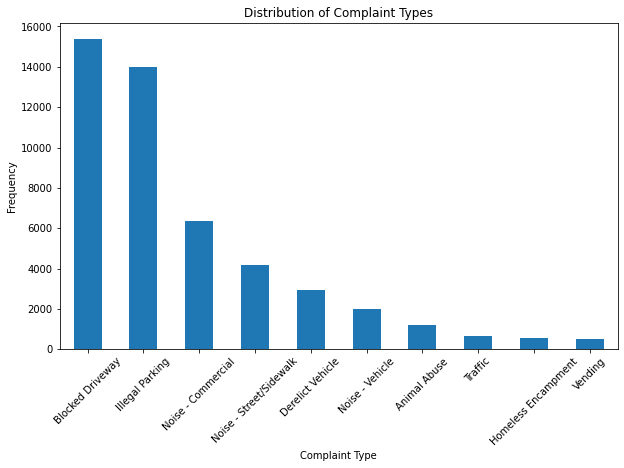

In [56]:
complaint_types = df['Complaint Type'].value_counts().head(10)  # Top 10 complaint types

# Plotting the bar chart
plt.figure(figsize=(10, 6))
complaint_types.plot(kind='bar')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.title('Distribution of Complaint Types')
plt.xticks(rotation=45)
plt.show()

In [57]:
#These are the top issues reported and their frequencies

In [58]:
average_response_time = df['Request_Closing_Time'].dt.total_seconds() / (60 * 60) #request closing time in hours
print("Average Response Time:", average_response_time)

Average Response Time: 0        0.925000
1        1.453611
2        4.859444
3        7.757500
4        3.462222
           ...   
48668    3.100556
48669    2.913611
48670    0.698333
48671    1.870556
48672    1.262778
Name: Request_Closing_Time, Length: 48673, dtype: float64


In [59]:
# Group by complaint type and calculate the average request closing time
average_response_time = df.groupby('Complaint Type')['Request_Closing_Time']

In [63]:
df['Complaint Type'] = df['Complaint Type'].fillna('Unknown')


In [64]:
# Group by complaint type and calculate the average request closing time
average_closing_time = df.groupby('Complaint Type')['Request_Closing_Time']

# Print the average closing time for each complaint type
print(average_closing_time)

In [66]:
# Print the complaint types with longer and shorter response times
longer_response_types = average_closing_time.tail(5)  # Example: Print top 5 complaint types with longer response times
shorter_response_types = average_closing_time.head(5)  # Example: Print top 5 complaint types with shorter response times

print("Complaint types with longer response times:")
print(longer_response_types)

print("\nComplaint types with shorter response times:")
print(shorter_response_types)


Complaint types with longer response times:
23527   0 days 00:19:01
25910   0 days 02:08:33
27205   0 days 03:29:16
28024   0 days 09:15:50
33619   0 days 01:53:46
              ...      
48668   0 days 03:06:02
48669   0 days 02:54:49
48670   0 days 00:41:54
48671   0 days 01:52:14
48672   0 days 01:15:46
Name: Request_Closing_Time, Length: 99, dtype: timedelta64[ns]

Complaint types with shorter response times:
0       0 days 00:55:30
1       0 days 01:27:13
2       0 days 04:51:34
3       0 days 07:45:27
4       0 days 03:27:44
              ...      
23527   0 days 00:19:01
25745   0 days 06:00:15
34227   0 days 12:06:43
37949   0 days 01:29:20
45424   1 days 05:00:42
Name: Request_Closing_Time, Length: 99, dtype: timedelta64[ns]


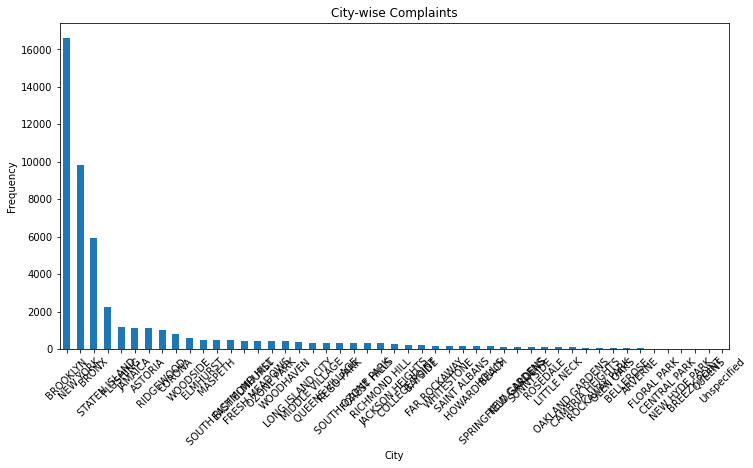

In [67]:
#Visualize the number of complaints reported in different locations (e.g., boroughs, neighborhoods) using a bar chart or map.
#Frequency Plot for City-wise Complaints
plt.figure(figsize=(12, 6))
df['City'].value_counts().plot(kind='bar')
plt.title('City-wise Complaints')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Top 10 complaints types
top_10_complaints = df['Complaint Type'].value_counts().head(10)
print(top_10_complaints)

Blocked Driveway           15396
Illegal Parking            14012
Noise - Commercial          6374
Noise - Street/Sidewalk     4172
Derelict Vehicle            2963
Noise - Vehicle             1984
Animal Abuse                1210
Traffic                      673
Homeless Encampment          545
Vending                      498
Name: Complaint Type, dtype: int64


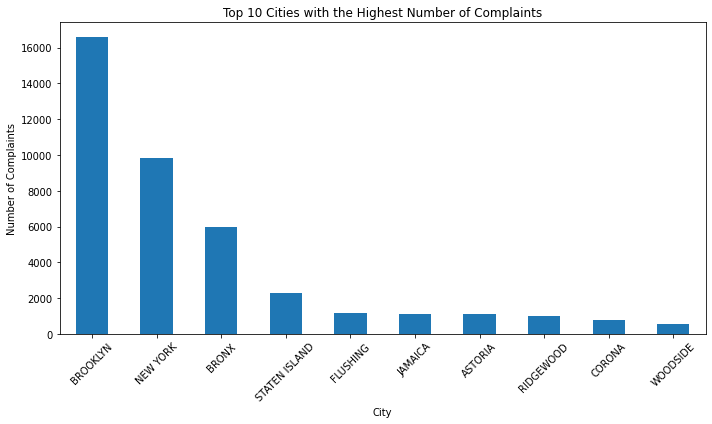

In [69]:
complaints_by_city = df['City'].value_counts()
plt.figure(figsize=(10, 6))
complaints_by_city.head(10).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.title('Top 10 Cities with the Highest Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

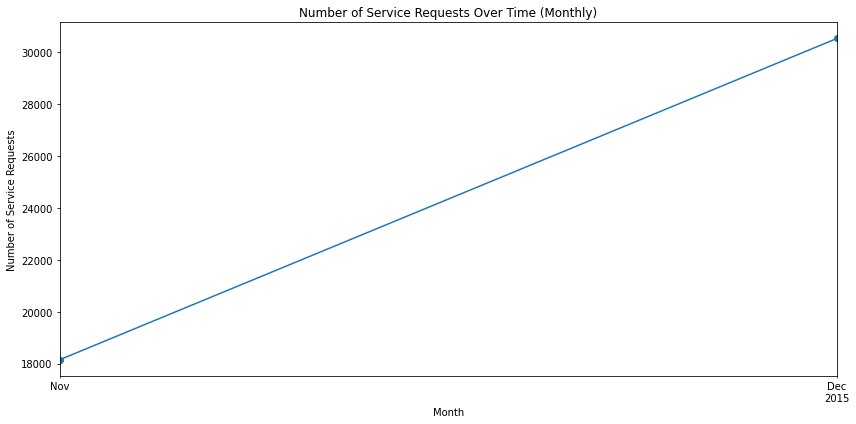

In [70]:
#Plot the number of service requests over time (e.g., monthly or yearly) using a line chart or bar chart.

df['Created Date'] = pd.to_datetime(df['Created Date'])

# Group by month and count the number of requests in each month
requests_by_month = df.groupby(df['Created Date'].dt.to_period('M')).size()

# Plotting the line chart to visualize the number of service requests over time
plt.figure(figsize=(12, 6))
requests_by_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Service Requests')
plt.title('Number of Service Requests Over Time (Monthly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
#To identify any notable trends in complaint volumes, such as increasing or decreasing patterns

# Group by date and count the number of complaints on each date
complaints_by_date = df.groupby(df['Created Date'].dt.date).size()

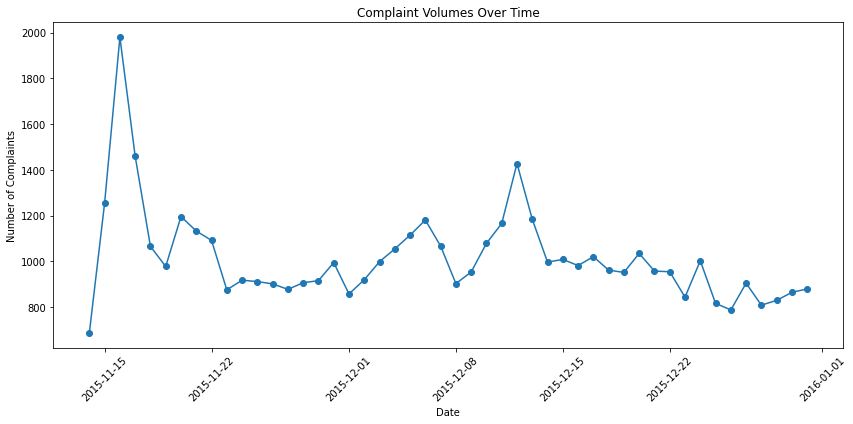

In [73]:
# Plotting the line chart to visualize the complaint volumes over time
plt.figure(figsize=(12, 6))
complaints_by_date.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Complaint Volumes Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
#To analyze seasonal patterns or spikes in specific periods

# Extract the month from the 'Created Date' column
df['Month'] = df['Created Date'].dt.month

In [75]:
# Count the number of complaints in each month
complaints_by_month = df.groupby('Month').size()

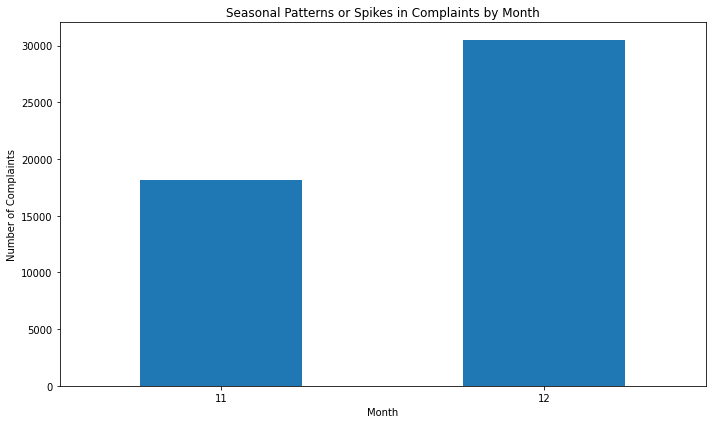

In [76]:
# Plotting the bar chart to visualize the seasonal patterns or spikes

plt.figure(figsize=(10, 6))
complaints_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Seasonal Patterns or Spikes in Complaints by Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()